In [39]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

In [22]:
# Import data
data = pd.read_csv('../Data/OITNB_Sexual_Encounters.csv')
data

,Season,Episode,Title,Person1,Person2,Start,End,Duration,Location,Type,Queer,Transactional,NonConsentual,Notes
0,1,1,I Wasn't Ready,Alex Vause,Piper Chapman,51:55,51:47,00:08,Flashback,"Groping/Touching, Kiss/Kissing",1,0,0,NaN
1,1,1,I Wasn't Ready,Larry Bloom,Piper Chapman,51:47,51:39,00:08,Flashback,Kiss/Kissing,0,0,0,NaN
2,1,1,I Wasn't Ready,Larry Bloom,Piper Chapman,47:26,47:05,00:21,Outside,"Groping/Touching, Kiss/Kissing",0,0,0,NaN
3,1,1,I Wasn't Ready,Larry Bloom,Piper Chapman,45:10,45:01,00:09,Outside,"Groping/Touching, Kiss/Kissing",0,0,0,NaN
4,1,1,I Wasn't Ready,Larry Bloom,Piper Chapman,44:44,44:34,00:10,Outside,"Groping/Touching, Kiss/Kissing",0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,7,12,The Big House,Aleida Diaz,Rick Hopper,45:29,44:52,00:37,Litchfield,Penetrative sex (penis),0,0,0,NaN
303,7,12,The Big House,Lorna Morello,Nicky Nichols,18:19,18:18,00:01,Litchfield,Kiss/Kissing,1,0,0,NaN
304,7,13,Here's Where We Get Off,Piper Chapman,Zelda,70:51,70:50,00:01,Outside,Kiss/Kissing,1,0,0,NaN
305,7,13,Here's Where We Get Off,Blanca Flores,"Dario ""Diablo"" Zuniga",06:52,06:51,00:01,Outside,Kiss/Kissing,0,0,0,NaN


In [31]:
# Format duration
data['durform'] = pd.to_datetime(data['Duration'], format='%M:%S').dt.strftime('%H:%M:%S')
data['DurForm'] = pd.to_timedelta(data.durform)
print(data[['Duration', 'durform', 'DurForm']].dtypes)
data[['Duration', 'durform', 'DurForm']]

Duration             object
durform              object
DurForm     timedelta64[ns]
dtype: object


,Duration,durform,DurForm
0,00:08,00:00:08,00:00:08
1,00:08,00:00:08,00:00:08
2,00:21,00:00:21,00:00:21
3,00:09,00:00:09,00:00:09
4,00:10,00:00:10,00:00:10
...,...,...,...
302,00:37,00:00:37,00:00:37
303,00:01,00:00:01,00:00:01
304,00:01,00:00:01,00:00:01
305,00:01,00:00:01,00:00:01


### Time trends

In [36]:
# Overall onscreen encounter time by season
season = data.groupby(['Season'], as_index=False)[['DurForm']].agg('sum')
season

,Season,DurForm
0,1,00:07:04
1,2,00:08:30
2,3,00:06:48
3,4,00:05:02
4,5,00:03:32
5,6,00:03:17
6,7,00:07:08


In [45]:
# Total time in sec
season['dur_sec'] = season['DurForm'] / np.timedelta64(1, 's')
season

,Season,DurForm,dur_sec
0,1,00:07:04,424.0
1,2,00:08:30,510.0
2,3,00:06:48,408.0
3,4,00:05:02,302.0
4,5,00:03:32,212.0
5,6,00:03:17,197.0
6,7,00:07:08,428.0


(0.0, 525650000000.0)

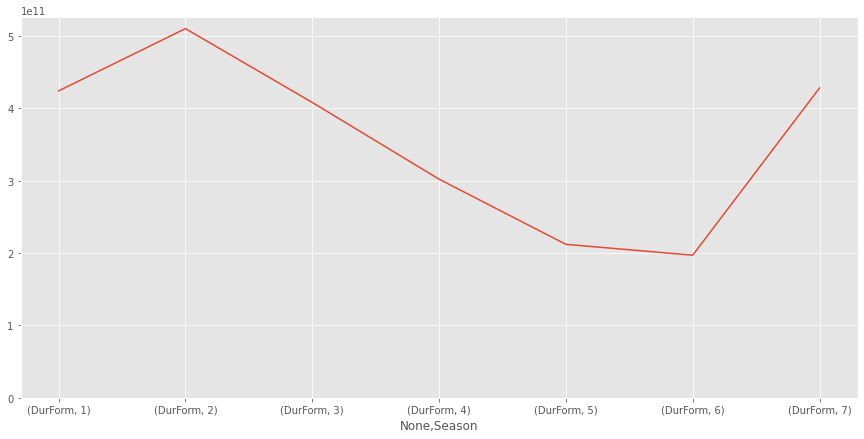

In [49]:
# Plot by season
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Season'])[['DurForm']].agg('sum').unstack().plot(ax=ax) #yaxis is nanoseconds in sci notation
ax.set_ylim(ymin=0)

In [72]:
# Split by queer onscreen encounters
season = data.groupby(['Season', 'Queer'], as_index=False)[['DurForm']].agg('sum')
# Add in total time in sec
season['dur_sec'] = season['DurForm'] / np.timedelta64(1, 's')
season

,Season,Queer,DurForm,dur_sec
0,1,0,00:03:36,216.0
1,1,1,00:03:28,208.0
2,2,0,00:03:53,233.0
3,2,1,00:04:37,277.0
4,3,0,00:04:14,254.0
5,3,1,00:02:34,154.0
6,4,0,00:01:50,110.0
7,4,1,00:03:12,192.0
8,5,0,00:01:38,98.0
9,5,1,00:01:54,114.0


(0.0, 286200000000.0)

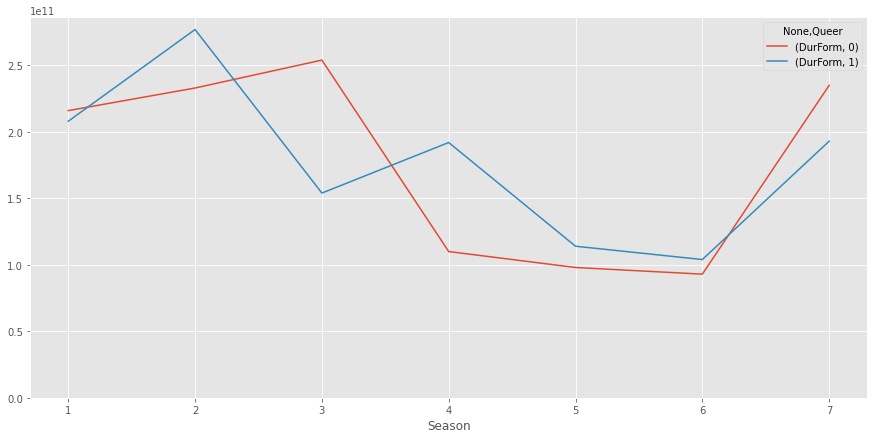

In [141]:
# Plot by season
#data.groupby(['Season', 'Queer'])[['DurForm']].agg('sum')

fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Season', 'Queer'])[['DurForm']].agg('sum').unstack().plot(ax=ax) #yaxis is nanoseconds in sci notation
ax.set_ylim(ymin=0)

So, overall onscreen sexual/romantic encounters decreased in S3-6, but then went back to the beginning level in S7. Queer/non-queer screen time was comperable in S1, S5, and S6. More Queer representation in S2, S4 and more non-queer representation in S3, S7

In [95]:
# By episode, and normalize

# Split
episode = data.groupby(['Season', 'Episode', 'Queer'], as_index=False)[['DurForm']].agg('sum')
# Add in total time in sec
episode['dur_sec'] = episode['DurForm'] / np.timedelta64(1, 's')
print(episode.shape)
episode

(116, 5)


,Season,Episode,Queer,DurForm,dur_sec
0,1,1,0,00:00:55,55.0
1,1,1,1,00:01:10,70.0
2,1,2,0,00:00:31,31.0
3,1,2,1,00:00:08,8.0
4,1,3,0,00:00:04,4.0
...,...,...,...,...,...
111,7,11,1,00:00:06,6.0
112,7,12,0,00:00:37,37.0
113,7,12,1,00:00:18,18.0
114,7,13,0,00:00:01,1.0


In [96]:
# Import episode length data
eplen = pd.read_csv('../Data/OITNB_Episode_Length.csv')
eplen

,Season,Episode,Title,EpLength
0,1,1,I Wasn't Ready,0:52:15
1,1,2,Tit Punch,0:53:00
2,1,3,Lesbian Request Denied,0:57:31
3,1,4,Imaginary Enemies,0:55:20
4,1,5,The Chickening,0:55:28
...,...,...,...,...
86,7,9,The Hidey Hole,1:00:26
87,7,10,The Thirteenth,1:00:54
88,7,11,God Bless America,1:01:11
89,7,12,The Big House,1:15:45


In [100]:
# Format duration
eplen['eplenform'] = pd.to_datetime(eplen['EpLength'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
eplen['EpLengthForm'] = pd.to_timedelta(eplen.eplenform)

# Add in total time in sec
eplen['EpLength_sec'] = eplen['EpLengthForm'] / np.timedelta64(1, 's')

print(eplen[['EpLength', 'EpLengthForm', 'EpLength_sec']].dtypes)
eplen[['EpLength', 'EpLengthForm', 'EpLength_sec']]
eplen

EpLength                 object
EpLengthForm    timedelta64[ns]
EpLength_sec            float64
dtype: object


,Season,Episode,Title,EpLength,eplenform,EpLengthForm,EpLength_sec,Queer
0,1,1,I Wasn't Ready,0:52:15,00:52:15,00:52:15,3135.0,0
1,1,2,Tit Punch,0:53:00,00:53:00,00:53:00,3180.0,0
2,1,3,Lesbian Request Denied,0:57:31,00:57:31,00:57:31,3451.0,0
3,1,4,Imaginary Enemies,0:55:20,00:55:20,00:55:20,3320.0,0
4,1,5,The Chickening,0:55:28,00:55:28,00:55:28,3328.0,0
...,...,...,...,...,...,...,...,...
86,7,9,The Hidey Hole,1:00:26,01:00:26,01:00:26,3626.0,0
87,7,10,The Thirteenth,1:00:54,01:00:54,01:00:54,3654.0,0
88,7,11,God Bless America,1:01:11,01:01:11,01:01:11,3671.0,0
89,7,12,The Big House,1:15:45,01:15:45,01:15:45,4545.0,0


In [108]:
#Duplicate eplen set to have 2 rows per episodes (1 queer and 1 non-queer)
eplen2 = eplen.copy()
eplen2
# Assign queer vars
eplen['Queer'] = 0
eplen2['Queer'] = 1
# Concatinate
eplens = pd.concat([eplen, eplen2])
eplens = eplens.sort_values(by=['Season', 'Episode'])
eplens

,Season,Episode,Title,EpLength,eplenform,EpLengthForm,EpLength_sec,Queer
0,1,1,I Wasn't Ready,0:52:15,00:52:15,00:52:15,3135.0,0
0,1,1,I Wasn't Ready,0:52:15,00:52:15,00:52:15,3135.0,1
1,1,2,Tit Punch,0:53:00,00:53:00,00:53:00,3180.0,0
1,1,2,Tit Punch,0:53:00,00:53:00,00:53:00,3180.0,1
2,1,3,Lesbian Request Denied,0:57:31,00:57:31,00:57:31,3451.0,0
...,...,...,...,...,...,...,...,...
88,7,11,God Bless America,1:01:11,01:01:11,01:01:11,3671.0,1
89,7,12,The Big House,1:15:45,01:15:45,01:15:45,4545.0,0
89,7,12,The Big House,1:15:45,01:15:45,01:15:45,4545.0,1
90,7,13,Here's Where We Get Off,1:29:49,01:29:49,01:29:49,5389.0,0


In [114]:
## Merge with grouped episode data - want dataset with 2 rows for each dataset, 1 for queer dur and 1 for non-queer (n=182)
# Merge 1
allepisodes = pd.merge(episode, eplens, how='outer', on=['Season', 'Episode', 'Queer'])
# Drop formatted time vars (keep only sec integers)
allepisodes = allepisodes.drop(columns=['DurForm', 'EpLength', 'eplenform', 'EpLengthForm'])
# Fill missing time as 0
allepisodes = allepisodes.fillna(0)
# Sort
allepisodes = allepisodes.sort_values(by=['Season', 'Episode', 'Queer'])

allepisodes.tail(30)

,Season,Episode,Queer,dur_sec,Title,EpLength_sec
172,6,12,0,0.0,Double Trouble,3610.0
96,6,12,1,2.0,Double Trouble,3610.0
173,6,13,0,0.0,Be Free,5109.0
97,6,13,1,10.0,Be Free,5109.0
98,7,1,0,41.0,Beginning of the End,3324.0
99,7,1,1,7.0,Beginning of the End,3324.0
100,7,2,0,19.0,Just Desserts,3392.0
174,7,2,1,0.0,Just Desserts,3392.0
101,7,3,0,6.0,And Brown Is the New Orange,3658.0
175,7,3,1,0.0,And Brown Is the New Orange,3658.0


[1.07692308 1.15384615 1.23076923 1.30769231 1.38461538 1.46153846
 1.53846154 1.61538462 1.69230769 1.76923077 1.84615385 1.92307692
 2.         2.07692308 2.15384615 2.23076923 2.30769231 2.38461538
 2.46153846 2.53846154 2.61538462 2.69230769 2.76923077 2.84615385
 2.92307692 3.         3.07692308 3.15384615 3.23076923 3.30769231
 3.38461538 3.46153846 3.53846154 3.61538462 3.69230769 3.76923077
 3.84615385 3.92307692 4.         4.07692308 4.15384615 4.23076923
 4.30769231 4.38461538 4.46153846 4.53846154 4.61538462 4.69230769
 4.76923077 4.84615385 4.92307692 5.         5.07692308 5.15384615
 5.23076923 5.30769231 5.38461538 5.46153846 5.53846154 5.61538462
 5.69230769 5.76923077 5.84615385 5.92307692 6.         6.07692308
 6.15384615 6.23076923 6.30769231 6.38461538 6.46153846 6.53846154
 6.61538462 6.69230769 6.76923077 6.84615385 6.92307692 7.
 7.07692308 7.15384615 7.23076923 7.30769231 7.38461538 7.46153846
 7.53846154 7.61538462 7.69230769 7.76923077 7.84615385 7.92307692
 8.

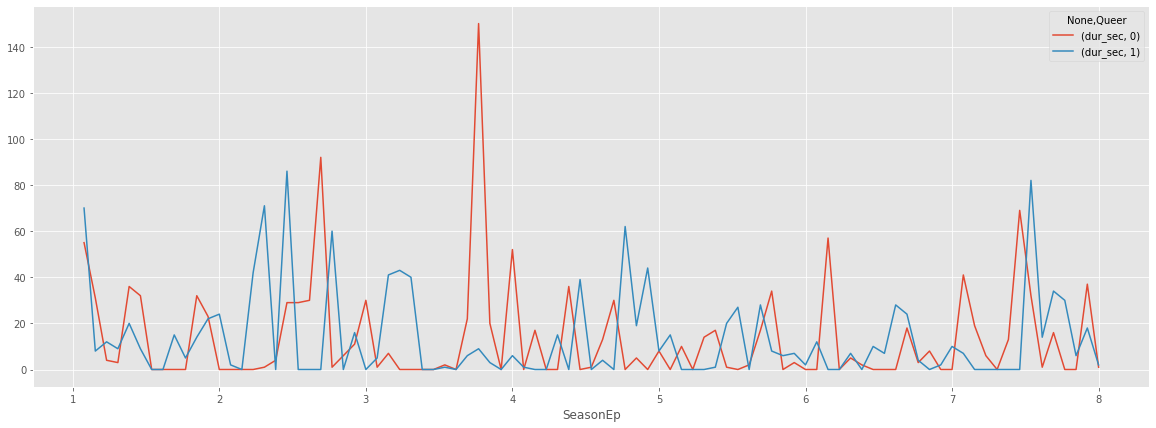

In [158]:
## Plot by episode

# Combined var for season & episode
allepisodes['SeasonEp'] = allepisodes['Season'] + allepisodes['Episode']/13
allepisodes
print(allepisodes.SeasonEp.unique())

# allepisodes.groupby(['SeasonEp', 'Queer'])[['dur_sec']].agg('sum')
# data.groupby(['Season', 'Queer'])[['DurForm']].agg('sum').unstack().plot(ax=ax)

# Plot
fig, ax = plt.subplots(figsize=(20,7))
allepisodes.groupby(['SeasonEp', 'Queer'])[['dur_sec']].agg('sum').unstack().plot(ax=ax)
# plt.xticks(np.arange(len(allepisodes.SeasonEp.unique())), allepisodes.SeasonEp.unique())
# plt.show()

In [162]:
import plotly.express as px

# Combined var for season & episode
allepisodes['SeasonEp'] = allepisodes['Season'] + allepisodes['Episode']/13

fig = px.line(allepisodes, x="SeasonEp", y="dur_sec", color="Queer", hover_data=["Season", "Episode", "Title"])
fig.show()